In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import nmrglue as ng
import os
import os.path
import sys
import pandas as pd
%matplotlib inline

In [177]:
ddir_tet="/Users/yunyao/Documents/Experiments_Data/data/Superatom_2020/20200708_Yunyao_C60/35/pdata/1"

In [178]:
dic, data=ng.bruker.read_pdata(ddir_tet)
udic=ng.bruker.guess_udic(dic,data)
uc=ng.fileiobase.uc_from_udic(udic)
ppm_scale=uc.ppm_scale()

In [72]:
float(data[0][uc(189.4,'ppm')])

1177772988.0

In [179]:
#new_df=pd.DataFrame(columns=['time','intensity'])
intensity=[]
for i in range(1,10):
    #val=data[i][uc(189.4,'ppm')]
    intensity.append(data[i][uc(189.5,'ppm')])
    #print(data[i][uc(189.4,'ppm')])


In [180]:
time=[]
ddir_time='/opt/topspin3.6.2/exp/stan/nmr/lists/vd/t1delay'
with open (ddir_time, 'r') as f:
    next(f)
    for line in f:
        #print(line)
        newline=line.rstrip('\n').rstrip('\\').rstrip('\t').rstrip('\ ')
        time.append(float(newline))

In [181]:
#normalized the intensity
intensity_nor=intensity/max(intensity)

In [182]:
time_array=np.array(time)

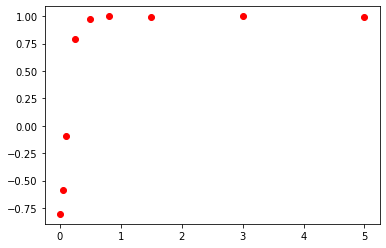

In [183]:
fig=plt.figure()
plt.plot(time,intensity_nor,'ro')


In [184]:
def _T1_recovery(x, t1):
    return 1-2*np.exp(-x/t1)

def T1_fit(time, intensity, initial_val):
    popt, pcov = scipy.optimize.curve_fit(_T1_recovery, time, intensity, initial_val)
    perr= np.sqrt(np.diag(pcov))
    decay_curve = _T1_recovery (time, *popt)
    print ("t1_value = {:0.2f} (+/-) {:0.2f}".format(popt[0], perr[0]))
    fig = plt.figure(figsize=(5,3))
    gs = gridspec.GridSpec(2,1,height_ratios=[1,0.25] )
    ax1 = fig.add_subplot(gs[0])
    #ax2  =fig.add_subplot(gs[1])
    gs.update(hspace=0)

    ax1.plot(time, intensity, "ro", label='Experimental data')
    ax1.plot(time, _T1_recovery(time,*popt), 'k--',linewidth=2, label='Fitted data')
    ax1.xaxis.set_major_locator(ticker.AutoLocator())
    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.set_xlabel('Delay time/S')
    ax1.set_ylabel('Normalized intensity')
    ax1.text(2, 0.6, "t1_value = {:0.2f} (+/-) {:0.2f}".format(popt[0], perr[0]))
    #ax1.set_xlim(max_ppm, min_ppm)
    #ax2.set_xlim(max_ppm, min_ppm)

    plt.tight_layout()
    plt.title('T1 fitting for KC60 13C at 270K')
    ax1.legend()
    
    fig.savefig("T1 fitting for KC60 13C at 270K.pdf", format="pdf",dpi=1000)
    #ax1.set_xscale('log')


t1_value = 0.15 (+/-) 0.01


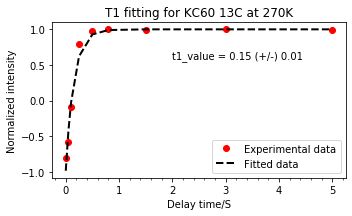

In [185]:
T1_fit(time_array,intensity_nor,0.2)